In [1]:
import numpy as np 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
from NeuralNetwork import NeuralNetwork as NN
from helper import load, get_metric
import pickle
import pandas as pd
import dataframe_image as dfi

In [2]:
trainX, trainY, testX, testY = load()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
network1 = NN([1024, 1 , 5], activation_func='sigmoid')
network1.fit(trainX, trainY, lambda x : 0.01, 1000, batch_size=32, print_every= 200, stop_thresh=1e-6)

Loss for epoch : 0 == 1.6115584282940199
Loss for epoch : 200 == 0.8824682171180939
Loss for epoch : 400 == 0.8082120206779654
Loss for epoch : 600 == 0.7753706805155364
Loss for epoch : 800 == 0.75363675788489
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!


In [15]:
np.mean(network1.predict(testX) == testY.argmax(axis=1))

0.653

# PART - B

In [3]:
layers_to_test = [[1024, 1 , 5], [1024, 5 , 5], [1024, 10 , 5] , [1024, 50 , 5], [1024, 100 , 5]]
for layer_info in layers_to_test:
    print("Training architecture : ", layer_info)
    network1 = NN(layer_info, activation_func='sigmoid')
    network1.fit(trainX, trainY, lambda x : 0.01, 1000, batch_size=32, print_every= 200, stop_thresh=1e-6)
    network1DICT = {"W": network1.W, "b" : network1.b, "epoch_losses" : network1.epoch_losses, "hidden_layers" : network1.layers_config , "activation" : network1.activation_function, "leakyReluSlope" : network1.leakyRelu_slope}
    model_name = "models/part_b/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.pickle"
    with open(model_name,'wb') as f:
        pickle.dump(network1DICT,f)
    report = get_metric(testY.argmax(axis = 1), network1.predict(testX.T))
    report = pd.DataFrame(report).transpose()
    result = "results/part_b/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.csv"
    report.to_csv(result)
    

Training architecture :  [1024, 1, 5]
Loss for epoch : 0 == 1.611553315151602
Loss for epoch : 200 == 0.8928733716539861
Loss for epoch : 400 == 0.8182091580862504
Loss for epoch : 600 == 0.7818657520155444
Loss for epoch : 800 == 0.7625328640725234
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!
Training architecture :  [1024, 5, 5]
Loss for epoch : 0 == 1.6086412328097077
Loss for epoch : 200 == 0.7033803374942947
Loss for epoch : 400 == 0.6770401121995375
Loss for epoch : 600 == 0.6600773441435909
Loss for epoch : 800 == 0.6473392489014014
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!
Training architecture :  [1024, 10, 5]
Loss for epoch : 0 == 1.6064470663490422
Loss for epoch : 200 == 0.6952661802584962
Loss for epoch : 400 == 0.6436315278393967
Loss for epoch : 600 == 0.6073158733226194
Loss for epoch : 800 == 0.575713771570003
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!
Training architectur

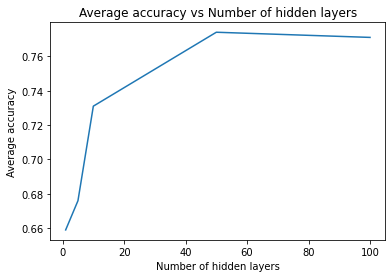

In [5]:
from matplotlib import pyplot as plt
average_acc = []
for layer_info in layers_to_test:
    result = "results/part_b/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.csv"
    report = pd.read_csv(result)
    average_acc.append(report.iloc[5][1])
plt.plot([1,5,10,50,100], average_acc)
plt.xlabel("Number of hidden layers")
plt.ylabel("Average accuracy")
plt.title("Average accuracy vs Number of hidden layers")
plt.savefig("results/part_b/average_accuracy_vs_hidden_layers.png")

# PART - C

In [7]:
layers_to_test = [[1024, 512 , 5], [1024, 512, 256 , 5], [1024, 512, 256, 128 , 5] , [1024, 512, 256, 128, 64 , 5]]
for layer_info in layers_to_test:
    print("Training architecture : ", layer_info)
    network1 = NN(layer_info, activation_func='sigmoid')
    network1.fit(trainX, trainY, lambda x : 0.01, 1000, batch_size=32, print_every= 200, stop_thresh=1e-6)
    network1DICT = {"W": network1.W, "b" : network1.b, "epoch_losses" : network1.epoch_losses, "hidden_layers" : network1.layers_config , "activation" : network1.activation_function, "leakyReluSlope" : network1.leakyRelu_slope}
    model_name = "models/part_c/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.pickle"
    with open(model_name,'wb') as f:
        pickle.dump(network1DICT,f)
    report = get_metric(testY.argmax(axis = 1), network1.predict(testX.T))
    report = pd.DataFrame(report).transpose()
    result = "results/part_c/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.csv"
    report.to_csv(result)
    

Training architecture :  [1024, 512, 5]
Loss for epoch : 0 == 1.5899863646777759
Loss for epoch : 200 == 0.6985057618604792
Loss for epoch : 400 == 0.668660049467737
Loss for epoch : 600 == 0.6255165242101917
Loss for epoch : 800 == 0.579521065321335
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!
Training architecture :  [1024, 512, 256, 5]
Loss for epoch : 0 == 1.6136440146565105
Loss for epoch : 200 == 0.6965143662217319
Loss for epoch : 400 == 0.6324406039695445
Loss for epoch : 600 == 0.5370627260487939
Loss for epoch : 800 == 0.4632246888147614
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!
Training architecture :  [1024, 512, 256, 128, 5]
Loss for epoch : 0 == 1.6149754509464107
Loss for epoch : 200 == 0.7044838335672838
Loss for epoch : 400 == 0.602891520603255
Loss for epoch : 600 == 0.5123405811543883
Loss for epoch : 800 == 0.43872757504966386
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!


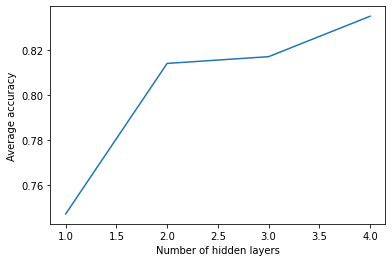

In [9]:
average_acc = []
for layer_info in layers_to_test:
    result = "results/part_c/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.csv"
    report = pd.read_csv(result)
    average_acc.append(report.iloc[5][1])
plt.plot([1,2,3,4], average_acc)
plt.xlabel("Number of hidden layers")
plt.ylabel("Average accuracy")
plt.savefig("results/part_c/average_accuracy_vs_hidden_layers.png")

In [10]:
import dataframe_image as dfi
for layer_info in layers_to_test:
    result = "results/part_c/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
    report = pd.read_csv(result + '.csv')
    dfi.export(report,result + ".png")

In [11]:
# train metrics
for layer_info in layers_to_test:
    model_name = "models/part_c/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.pickle"
    with open(model_name,'rb') as f:
        network1DICT = pickle.load(f)
    network1 = NN(layer_info, activation_func='sigmoid')
    network1.W = network1DICT["W"]
    network1.b = network1DICT["b"]
    network1.layers_config = network1DICT["hidden_layers"]
    network1.activation_function = network1DICT["activation"]
    network1.leakyRelu_slope = network1DICT["leakyReluSlope"]
    report = get_metric(trainY.argmax(axis = 1), network1.predict(trainX.T))
    report = pd.DataFrame(report).transpose()
    result = "results/part_c/train_model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
    report.to_csv(result + ".csv")
    dfi.export(report,result + ".png")

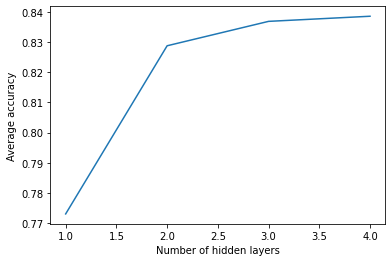

In [12]:
average_acc = []
for layer_info in layers_to_test:
    result = "results/part_c/train_model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.csv"
    report = pd.read_csv(result)
    average_acc.append(report.iloc[5][1])
plt.plot([1,2,3,4], average_acc)
plt.xlabel("Number of hidden layers")
plt.ylabel("Average accuracy")
plt.savefig("results/part_c/train_average_accuracy_vs_hidden_layers.png")

# PART - E

In [20]:
layers_to_test = [[1024, 512, 256 , 5], [1024, 512, 256, 128 , 5] , [1024, 512, 256, 128, 64 , 5]]
for layer_info in layers_to_test:
    print("Training architecture : ", layer_info)
    network1 = NN(layer_info, activation_func='ReLU')
    network1.fit(trainX, trainY, lambda x : 0.01 / np.sqrt(x), 1000, batch_size=32, print_every= 200, stop_thresh=1e-6)
    network1DICT = {"W": network1.W, "b" : network1.b, "epoch_losses" : network1.epoch_losses, "hidden_layers" : network1.layers_config , "activation" : network1.activation_function, "leakyReluSlope" : network1.leakyRelu_slope}
    model_name = "models/part_e/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_relu.pickle"
    with open(model_name,'wb') as f:
        pickle.dump(network1DICT,f)
    report_test = get_metric(testY.argmax(axis = 1), network1.predict(testX.T))
    report_test = pd.DataFrame(report_test).transpose()
    result_test = "results/part_e/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_relu"
    report_test.to_csv(result_test + ".csv")
    dfi.export(report_test,result_test + ".png")

    report_train = get_metric(trainY.argmax(axis = 1), network1.predict(trainX.T))
    report_train = pd.DataFrame(report_train).transpose()
    result_train = "results/part_e/train_model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_relu"
    report_train.to_csv(result_train + ".csv")
    dfi.export(report_train,result_train + ".png")
    

Training architecture :  [1024, 512, 256, 5]
Loss for epoch : 0 == 1.3659589170028161
Loss for epoch : 200 == 0.6404314021953401
Loss for epoch : 400 == 0.5688115185470687
Loss for epoch : 600 == 0.5151606419694613
Loss for epoch : 800 == 0.47550514201492217
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!
Training architecture :  [1024, 512, 256, 128, 5]
Loss for epoch : 0 == 1.387479018315105
Loss for epoch : 200 == 0.520260189037685
Loss for epoch : 400 == 0.40114853804833095
Loss for epoch : 600 == 0.32938026852361957
Loss for epoch : 800 == 0.2659329278771682
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMINATING TRAINING!!
Training architecture :  [1024, 512, 256, 128, 64, 5]
Loss for epoch : 0 == 1.4258741372304724
Loss for epoch : 200 == 0.452029326427275
Loss for epoch : 400 == 0.3371793698401638
Loss for epoch : 600 == 0.24769963227884287
Loss for epoch : 800 == 0.17690177599480222
 MAXIMUM EPOCHS REACHED WITHOUT DESIRED CONVERGENCE. TERMI

In [4]:
layers_to_test = [[1024, 512 , 5], [1024, 512, 256 , 5], [1024, 512, 256, 128 , 5] , [1024, 512, 256, 128, 64 , 5]]

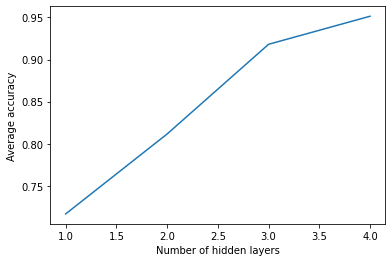

In [25]:
average_acc = []
for layer_info in layers_to_test:
    result = "results/part_e/train_model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_relu.csv"
    report = pd.read_csv(result)
    average_acc.append(report.iloc[5][1])
plt.plot([1,2,3,4], average_acc)
plt.xlabel("Number of hidden layers")
plt.ylabel("Average accuracy")
plt.savefig("results/part_e/train_average_accuracy_vs_hidden_layers.png")

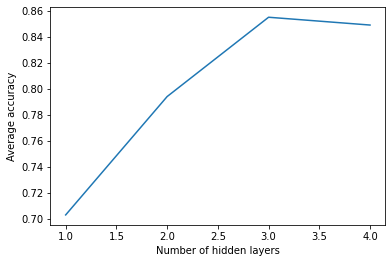

In [27]:
average_acc = []
for layer_info in layers_to_test:
    result = "results/part_e/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_relu.csv"
    report = pd.read_csv(result)
    average_acc.append(report.iloc[5][1])
plt.plot([1,2,3,4], average_acc)
plt.xlabel("Number of hidden layers")
plt.ylabel("Average accuracy")
plt.savefig("results/part_e/average_accuracy_vs_hidden_layers.png")

# PART-F

In [4]:
layers_to_test = [[1024, 512 , 5], [1024, 512, 256 , 5], [1024, 512, 256, 128 , 5] , [1024, 512, 256, 128, 64 , 5]]
layers_to_test_MLP = [i[1:-1] for i in layers_to_test]

In [5]:
import time

In [6]:
for layer_info in layers_to_test_MLP:
    print("Testing layer info : ", layer_info)
    model = MLPClassifier(hidden_layer_sizes=layer_info, activation='relu', solver='sgd', max_iter=1000, learning_rate='invscaling', random_state=1)
    t = time.time()
    model.fit(trainX, trainY.argmax(axis = 1))
    print(f'Time taken to train MLP with {layer_info} hidden layers : {time.time() - t} seconds')
    report_test = get_metric(testY.argmax(axis = 1), model.predict(testX))
    report_test = pd.DataFrame(report_test).transpose()
    result_test = "results/part_f/model_H_" + "_".join([str(i) for i in layer_info]) + "_BATCH_EPOCH_1000_32_activation_relu"
    report_test.to_csv(result_test + ".csv")
    dfi.export(report_test,result_test + ".png")

    report_train = get_metric(trainY.argmax(axis = 1), model.predict(trainX))
    report_train = pd.DataFrame(report_train).transpose()
    result_train = "results/part_f/train_model_H_" + "_".join([str(i) for i in layer_info]) + "_BATCH_EPOCH_1000_32_activation_relu"
    report_train.to_csv(result_train + ".csv")
    dfi.export(report_train,result_train + ".png")

Testing layer info :  [512]
Time taken to train MLP with [512] hidden layers : 110.92566418647766 seconds
Testing layer info :  [512, 256]
Time taken to train MLP with [512, 256] hidden layers : 149.16316509246826 seconds
Testing layer info :  [512, 256, 128]
Time taken to train MLP with [512, 256, 128] hidden layers : 172.82021689414978 seconds
Testing layer info :  [512, 256, 128, 64]
Time taken to train MLP with [512, 256, 128, 64] hidden layers : 344.9642608165741 seconds


# PART-D

In [ ]:
for layer_info in layers_to_test:
    print("Training architecture : ", layer_info)
    network1 = NN(layer_info, activation_func='sigmoid')
    network1.fit(trainX, trainY, lambda x : 0.01/np.sqrt(x), 1000, batch_size=32, print_every= 200, stop_thresh=1e-6)
    network1DICT = {"W": network1.W, "b" : network1.b, "epoch_losses" : network1.epoch_losses, "hidden_layers" : network1.layers_config , "activation" : network1.activation_function, "leakyReluSlope" : network1.leakyRelu_slope}
    model_name = "models/partd_d/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.pickle"
    with open(model_name,'wb') as f:
        pickle.dump(network1DICT,f)
    report = get_metric(testY.argmax(axis = 1), network1.predict(testX.T))
    report = pd.DataFrame(report).transpose()
    result = "results/part_d/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
    report.to_csv(result + '.csv')
    dfi.export(report,result + '.png')
    
    report_train = get_metric(trainY.argmax(axis = 1), network1.predict(trainX.T))
    report_train = pd.DataFrame(report_train).transpose()
    result_train = "results/part_d/train_model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
    report_train.to_csv(result_train + ".csv")
    dfi.export(report_train,result_train + ".png")